<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/M3_MP4_NB_Community_detection_PPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project 04: Community Detection in protein-protein interaction network

## Description

Inferring significant communities of interacting proteins is a main trend of current biological research, as this task can help in revealing the functionality and the relevance of specific macromolecular assemblies or even in discovering possible proteins networks may support drug discovery and diseases treatment even in earlier stages. 

## Learning Objectives

At the end of the mini project, you will be able to understand-
 
* Community Detection in protein networks.



**Packages used:**  

* `networkx` for graph analysis
* `requests` for fetching data over the internet  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` for visualization

In [1]:
#@title Download dataset 
!gdown "1kRo8CpbqBQUenG1oyArq9qarenQjbEVy&confirm=t"
!pip install networkx==2.4

Downloading...
From: https://drive.google.com/uc?id=1kRo8CpbqBQUenG1oyArq9qarenQjbEVy&confirm=t
To: /content/DM-LC.txt
100% 27.1k/27.1k [00:00<00:00, 23.7MB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [2]:
#import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms.community import k_clique_communities
from operator import itemgetter

from networkx.algorithms import node_classification
from networkx.algorithms import community

In [3]:
#load file (DM-LC)
df = pd.read_csv('DM-LC.txt',  sep= '\s+', header = None)
#df = pd.read_table('DM-LC.txt', header= None)
df.head()

,0,1,2
0,B0024.14,F38E9.2,3.4297
1,B0025.2,F11C1.6,3.4297
2,B0025.2,F55D12.4,3.4297
3,B0025.2,F57B9.10,3.4297
4,B0035.10,B0207.4,3.4297


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1129 non-null   object 
 1   1       1129 non-null   object 
 2   2       1129 non-null   float64
dtypes: float64(1), object(2)
memory usage: 26.6+ KB


In [5]:
df.shape

(1129, 3)

## Protein protein interaction(PPI)

PPI networks are the networks of protein complexes formed by biochemical events or electrostatic forces serving a biological function. Since the analysis of the protein networks is now growing, we have more information regarding protein, genomes and their influence on life. Today, PPI networks are used to study diseases, improve drugs and understand other processes in medicine and health that will eventually help mankind.

Proteins are linear chain biomolecules that are the basis of functional networks in all organisms. Protein Interactions can be very helpful in shedding light on different types of proteins and how they function. For instance, most cancers are caused by increasing interaction edge weights of oncogenes and decreasing interaction edge weights of tumor suppressor genes. Here the protein protein interaction in fly(Drosophila melanogaster) has been carried out and the dataset DM-LC.txt has been used to perform the comunity detection on PPI. 

The fruit fly, Drosophila melanogaster, is used as a model organism to study disciplines ranging from fundamental genetics to the development of tissues and organs. Drosophila genome is 60% homologous to that of humans, less redundant, and about 75% of the genes responsible for human diseases have homologs in flies.These features, together with a brief generation time, low maintenance costs, and the availability of powerful genetic tools, allow the fruit fly to be eligible to study complex pathways relevant in biomedical research, including cancer.


Please open the link for more information on the dataset. https://www.inetbio.org/wormnet/downloadnetwork.php



In [6]:
#Q1. Create network (g) with Networkx and print the result(3 MARKS)
G = nx.Graph()
G.add_weighted_edges_from(df.values)

In [7]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 658\nNumber of edges: 1129\nAverage degree:   3.4316'

In [8]:
#list(nx.connected_components(G))
Gcc = max(nx.connected_components(G))
#print(Gcc)

G0 = G.subgraph(Gcc)

In [17]:
#Q2 Draw the graph for network(g) (1 MARKS)
from matplotlib.pyplot import figure
figure(figsize=(8, 8))
nx.draw_shell(G0, with_labels=True)

TypeError: ignored

<Figure size 800x800 with 0 Axes>

In [11]:
#Q3. Compute number of nodes, number of edges and the average degree of the network. (1 MARKS)
print("Number of Nodes : ", G.number_of_nodes())

Number of Nodes :  658


In [12]:
print("Number of Edges : ", G.number_of_edges())

Number of Edges :  1129


In [13]:
Average_degree = 2*G.number_of_edges() / float(G.number_of_nodes())
print("Average Degree : ", Average_degree)

Average Degree :  3.43161094224924


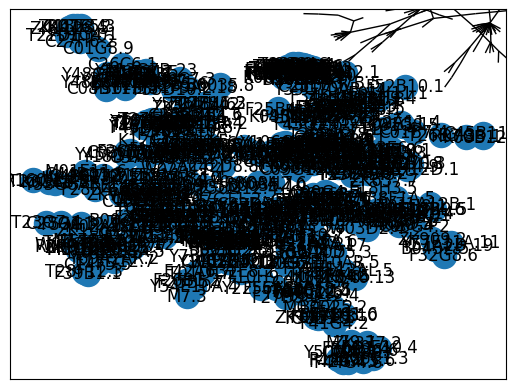

In [14]:
#Q4. calcualte the minimum spanning tree in g and draw it. (1 MARKS)
H = nx.minimum_spanning_tree(G0)
#nx.draw(H, pos=nx.spring_layout(H)) 
nx.draw_networkx(H)

In [ ]:
#Q5. Draw the degree distribution histogram. (1 MARKS)
# YOUR CODE HERE

## Comunity Detection
The ability to identify and characterize not only the protein-protein interactions but also their internal modular organization through network analysis. For this procedure there are many methods are available, Here we are considering Girvan-Newman algorithm for the detection and analysis of community structure.

### Girvan and Newman

The Girvan-Newman algorithm for the detection and analysis of community structure relies on the iterative elimination of edges that have the highest number of shortest paths between nodes passing through them. By removing edges from the graph one-by-one, the network breaks down into smaller pieces, so-called communities. The algorithm was introduced by Michelle Girvan and Mark Newman.

The method is divisive method where edge weight is the number of shortest paths passing through the edge. That value is called edge betweenness and it is a generalization of central vertex betweenness which determines vertex
influence on other vertices in network. Vertex betweennes is the number of shortest paths passing through the vertex, therefore, edge betweenness is the number of shortest paths passing through the endpoints of the edge.

#### Algorithm
The algorithm as follows.\
1. Calculate edge betweenness for every edge in the graph.
2. Remove the edge with highest edge betweenness.
3. Calculate edge betweenness for remaining edges.
4. Repeat steps 2-3 until all edges are removed.



In [ ]:
#Q6 Perform community detection using Girvan-Newman algorithm. (1 MARK) 
# YOUR CODE HERE

In [ ]:
# Q7 Print the number of community detected.(1 MARK)

In [ ]:
# Q8 Plot the graph with different community in different color. (1 MARK)

## Conclusion

Girvan-Newman algorithm is one of the first algorithms
that deals with detecting communities in networks. But is has some limitations, as it is iterative process so if the no of nodes are more(tens of thousand) then the algorithm should be avoided. 